**Cross-Validation On Random Forest**

1.Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

2.Define x and y

In [5]:
df = pd.read_csv('Wine.csv')

#Find null values 
df.isna().sum()

#Data Spliting
x = df.drop("Customer_Segment",axis=1)
y = df["Customer_Segment"]


3.Create Random Forest Model

In [8]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=42)

4.Apply Stratified K-Fold Cross-Validation

In [11]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores = cross_val_score(rf_model,x,y,cv=skf)

print("Random Forest CV Scores:",cv_scores)
print("Random Forest CV Avg Accuracy:",cv_scores.mean())

Random Forest CV Scores: [0.97222222 1.         0.97222222 0.94285714 1.        ]
Random Forest CV Avg Accuracy: 0.9774603174603176


5.Train-Test Split(for comparision)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test,y_pred)

print("Random Forest Train-Test Accuracy:",test_accuracy)

Random Forest Train-Test Accuracy: 1.0


6.Visualization: Train-Test Vs CV

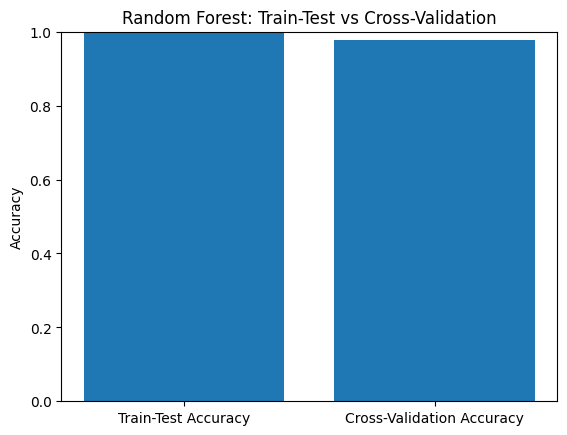

In [16]:
plt.bar(["Train-Test Accuracy","Cross-Validation Accuracy"],[test_accuracy,cv_scores.mean()])
plt.ylabel("Accuracy")
plt.title("Random Forest: Train-Test vs Cross-Validation")
plt.ylim(0,1)
plt.show()      